# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Tyler Stanton

#### GitHub Repo: https://github.com/S566248/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Adding the imports I am expecting to use.

In [19]:
from collections import Counter
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import string

!pip list

print('All prereqs installed.')

Package            VersionAll prereqs installed.

------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy   

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [20]:
url = "https://reflector.uindy.edu/2024/04/10/the-caitlin-clark-effect-how-the-iowa-star-is-changing-womens-sports/"

# Send a GET request to the URL to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content
    html_content = response.text

    # Write the HTML content to a file
    with open("article_html.html", "w", encoding="utf-8") as file:
        file.write(html_content)
        print("HTML content has been successfully saved to 'article_html.html'")
else:
    print("Failed to fetch HTML content from the URL")

HTML content has been successfully saved to 'article_html.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [21]:
from textblob import TextBlob

# Read the HTML source from the file
with open("article_html.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Extract the text from the article
article_text = soup.get_text()

# Perform sentiment analysis on the article's text
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Print the polarity score with an appropriate label
print("Polarity Score:", polarity_score)

# Count the number of sentences in the original article
sentences = blob.sentences
num_sentences = len(sentences)

# Print the number of sentences with an appropriate label
print("Number of Sentences:", num_sentences)

Polarity Score: 0.08538602759493166
Number of Sentences: 61


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [22]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Get all lowercase tokens from the processed text
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count the frequency of each token
token_freq = Counter(tokens)

# Get the 5 most frequent tokens
common_tokens = token_freq.most_common(5)

# Print the common tokens with their frequencies
print("Common Tokens:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

Common Tokens:

: 71
clark: 43
women: 24



: 18


: 16


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [23]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Get all lowercase lemmas from the processed text
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
common_lemmas = lemma_freq.most_common(5)

# Print the common lemmas with their frequencies
print("Common Lemmas:")
for lemma, freq in common_lemmas:
    print(f"{lemma}: {freq}")

Common Lemmas:

: 71
clark: 43
game: 26
woman: 20



: 18


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

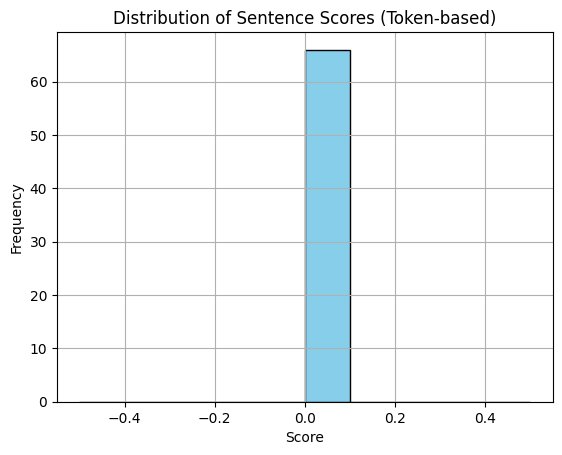

In [25]:
def sentiment_analysis_by_tokens(sentence):

    # Initialize variables to store the sentiment score and the number of tokens in the sentence
    sentiment_score = 0.0
    num_tokens = 0
    
    # Iterate through each token in the sentence
    for token in sentence:
        # Check if the token is not a stop word and has a sentiment value
        if not token.is_stop and token.sentiment:
            # Increment the sentiment score by the token's sentiment value
            sentiment_score += token.sentiment
        
        # Increment the number of tokens
        num_tokens += 1
    
    # Calculate the average sentiment score per token
    if num_tokens > 0:
        avg_sentiment_score = sentiment_score / num_tokens
    else:
        avg_sentiment_score = 0.0
    
    return avg_sentiment_score

# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML file
with open("article_html.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the HTML content
article_text = soup.get_text()

# Process the article text using spaCy
doc = nlp(article_text)

# Calculate the score for each sentence using tokens
scores = [sentiment_analysis_by_tokens(sent) for sent in doc.sents]

# Plot a histogram of the scores
plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Token-based)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# "The most common range of scores seems to be between 0 and 0.1

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

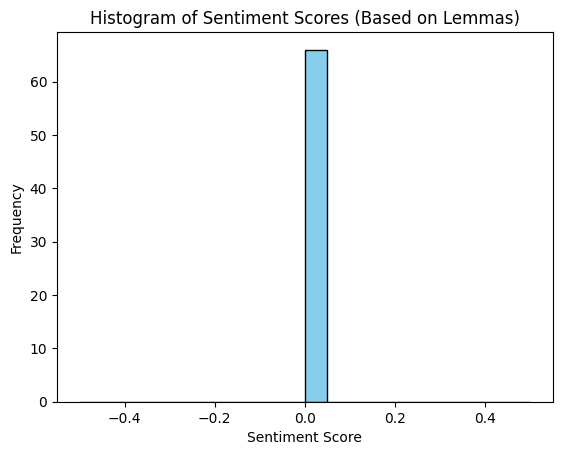

In [26]:

def sentiment_analysis_by_lemmas(sentence):
    """
    Perform sentiment analysis on a sentence based on lemmas.
    
    Args:
    - sentence (spacy.tokens.Span): A sentence parsed by spaCy.
    
    Returns:
    - float: The sentiment score of the sentence based on lemmas.
    """
    # Initialize variables to store the sentiment score and the number of lemmas in the sentence
    sentiment_score = 0.0
    num_lemmas = 0
    
    # Iterate through each token in the sentence
    for token in sentence:
        # Check if the token is not a stop word and has a sentiment value
        if not token.is_stop and token.lemma_ and token.sentiment:
            # Increment the sentiment score by the token's sentiment value
            sentiment_score += token.sentiment
        
        # Increment the number of lemmas
        num_lemmas += 1
    
    # Calculate the average sentiment score per lemma
    if num_lemmas > 0:
        avg_sentiment_score = sentiment_score / num_lemmas
    else:
        avg_sentiment_score = 0.0
    
    return avg_sentiment_score

# List to store sentiment scores of each sentence
sentiment_scores = []

# Iterate through each sentence in the article
for sentence in nlp(article_text).sents:
    # Calculate sentiment score for the sentence based on lemmas
    score = sentiment_analysis_by_lemmas(sentence)
    # Append the score to the list
    sentiment_scores.append(score)

# Plot histogram of sentiment scores
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores (Based on Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# "The most common range of scores seems to be between 0 and 0.1


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.2
* Cutoff Score (lemmas): 0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [28]:
cutoff_score_tokens = 0.2 

# List to store sentences with scores greater than the cutoff
summary_sentences = []

# Iterate through each sentence in the article
for sentence in nlp(article_text).sents:
    # Calculate sentiment score for the sentence based on tokens
    score = sentiment_analysis_by_tokens(sentence)
    
    # Check if the score is greater than the cutoff
    if score > cutoff_score_tokens:
        # Add the sentence to the summary list
        summary_sentences.append(sentence.text.strip())

# Generate the summary text by joining the sentences
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Summary of the article (based on token scores greater than the cutoff score):")
print(summary_text)

Summary of the article (based on token scores greater than the cutoff score):



9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [30]:
# Calculate the polarity score of the summary text
summary_polarity_score = sentiment_analysis_by_tokens(summary_text)

# Count the number of sentences in the summarized article
num_sentences_summary = len(summary_sentences)

# Print the polarity score of the summary
print("Polarity score of the summary (based on token scores):", summary_polarity_score)

# Print the number of sentences in the summarized article
print("Number of sentences in the summarized article:", num_sentences_summary)

Polarity score of the summary (based on token scores): 0.0
Number of sentences in the summarized article: 0


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [35]:
cutoff_score_lemmas = 0.2

# Initialize an empty list to store sentences for the summary
summary_sentences_lemmas = []

# Iterate through every sentence in the article
for sent in nlp(article_text).sents:
    # Calculate the score of the sentence based on lemmas
    score = sentiment_analysis_by_lemmas(sent.text)
    
    # Check if the score is greater than the cutoff score
    if score > cutoff_score_lemmas:
        # Add the sentence to the summary list
        summary_sentences_lemmas.append(sent.text.strip())

# Generate the summary text by joining the sentences in the list together with a space
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary
print("Summary based on lemmas:")
print(summary_text_lemmas)


AttributeError: 'str' object has no attribute 'is_stop'

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [36]:

# Perform sentiment analysis on the summary text using lemma scores
summary_polarity_score_lemmas = sentiment_analysis_by_lemmas(summary_text_lemmas)

# Calculate the number of sentences in the summarized article
num_sentences_summary_lemmas = len(summary_sentences_lemmas)

# Print the polarity score of the summary
print("Polarity score of the summary (based on lemmas):", summary_polarity_score_lemmas)

# Print the number of sentences in the summarized article
print("Number of sentences in the summarized article:", num_sentences_summary_lemmas)

NameError: name 'summary_text_lemmas' is not defined

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There is not a difference is polarity scores. This may be due to the semantic content and sentiment expressed by the text was mostly unchanged after lemmatization.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

There is not a difference between summaries. So there is not a better summary for this particular article